# Homework 2

### Due by 11:59pm on 2 November ( submit within Portfolio )

For each instruction, show your code and execution within the Jupyter Notebook.

In [13]:
#Instruction1: import library and settings

%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd 

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

mpl.style.use('classic')

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

# print(rcParams.keys())
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

#Instruction2: Describe your data set

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


In [98]:
#Instruction3: Import your dataset and print then number of rows and columns
import pandas as pd
graduation=pd.read_excel("data/Graduates Public by School 2017-18.xlsx", "Graduate Details", header=2)
sat = pd.read_excel("data/2018 SAT Scores for Public Schools.xlsx", header=5)
income = pd.read_excel("data/2018-2019 Public Schools Percent Low Income (1).xlsx", "1819 LIP by School", header=4)
budget = pd.read_excel("data/tabn235.20.xls", header=4)
act = pd.read_excel("data/2018 ACT Scores for Public Schools.xlsx", header=7)

print(len(graduation.columns))
print(len(graduation.index))
print(len(sat.columns))
print(len(sat.index))
print(len(income.columns))
print(len(income.index))
print(len(budget.columns))
print(len(budget.index))


16
1634
6
681
8
2994
15
76


In [73]:
#Instruction4: Show the names of the features/attributes of your dataset
print(graduaton.columns)
print(sat.columns)
print(income.columns)
print(budget.columns)

Index(['County Name', 'AUN', 'LEA', 'School Code', 'School', 'Graduate Count',
       'College Bound', 'Total College Bound %',
       '2- or 4-Year College or University', '2- Or 4-Year University %',
       'Total Postsecondary Bound', 'Total Postsecondary Bound %',
       'Non-Degree-Granting Postsecondary School',
       'Non-Degree-Granting Postsecondary School %',
       'Specialized Associate Degree Granting Institution',
       'Specialized Associate Degree Granting Institution %'],
      dtype='object')
Index(['DistrictName', 'SchoolName', 'N Count', 'Math Average',
       'Evidence Based Reading \nand Writing Average',
       'Composite Score Average'],
      dtype='object')
Index(['Office of Data Quality', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')
Index(['Table 235.20. Revenues for public elementary and secondary schools, by source of funds 

In [99]:
graduation.head()
sat.head()
act.head()
# income.head()
# budget.head()

,AICODE,AUN,LEA,School Number,School Name,N Tested,English Average,Reading Average,Writing Average,Math Average,Science Average,Composite Average
0,391348,124150002,21st Century Cyber CS,7691,21st Century Cyber CS,18,26,26,7,22,24,25
1,390675,119350303,Abington Heights SD,5091,Abington Heights HS,58,27,29,8,27,26,27
2,390000,123460302,Abington SD,3241,Abington SHS,102,27,27,8,26,26,26
3,393397,126510020,Agora Cyber CS,7858,Agora Cyber CS,19,20,21,6,18,20,20
4,394925,101260303,Albert Gallatin Area SD,6001,Albert Gallatin Area SHS,31,20,21,7,21,21,21


In [120]:
#Instruction5: use a SPLOM to visualize some columns of this dataset. In Panda's the SPLOM is a one-liner.

df1_graduation = graduation[['LEA','Graduate Count', 'Total Postsecondary Bound %']]
df1_graduation.head()
df2_income = income[['LEA', 'Percent of Enrollment from Low Income Families']]
df3_sat = sat[['DistrictName', 'Composite Score Average']]
df4_act = act[['LEA', 'Composite Average']]

In [121]:
df1_graduation.head()

,LEA,Graduate Count,Total Postsecondary Bound %
0,Bermudian Springs SD,147.0,0.714286
1,NaN,3.0,0
2,Bermudian Springs SD,150.0,0.7
3,Conewago Valley SD,267.0,0.696629
4,Conewago Valley SD,267.0,0.696629


In [122]:
df2_income.head()

,LEA,Percent of Enrollment from Low Income Families
0,21st Century Cyber CS,0.172470
1,A W Beattie Career Center,0.377407
2,ACT Academy Cyber CS,0.460526
3,ARIN IU 28,0.684211
4,ASPIRA Bilingual Cyber Charter School,0.487671


In [134]:
total_data = df1_graduation.merge(df2_income, left_on = 'LEA', right_on='LEA')

In [142]:
total_data = total_data.dropna()
total_data.head()

,LEA,Graduate Count,Total Postsecondary Bound %,Percent of Enrollment from Low Income Families
0,Bermudian Springs SD,147.0,0.714286,0.467532
1,Bermudian Springs SD,147.0,0.714286,0.351351
2,Bermudian Springs SD,147.0,0.714286,0.410684
3,Bermudian Springs SD,150.0,0.7,0.467532
4,Bermudian Springs SD,150.0,0.7,0.351351


In [147]:
total_data['Total Postsecondary Bound %'] = total_data['Total Postsecondary Bound %'].astype(float) 

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
total_data = total_data.groupby("LEA").mean().reset_index()
total_data = total_data.merge(df3_sat, left_on = 'LEA', right_on='DistrictName')
total_data = total_data.drop(columns=['DistrictName'])
total_data = total_data.merge(df4_act, left_on = 'LEA', right_on = 'LEA')

total_data.head()

,LEA,Graduate Count,Total Postsecondary Bound %,Percent of Enrollment from Low Income Families,Composite Score Average,Composite Average
0,21st Century Cyber CS,156.0,0.467949,0.172470,1110.3,25
1,Abington Heights SD,255.5,0.876716,0.216337,1176.1,27
2,Abington SD,562.0,0.855872,0.261723,1122.3,26
3,Agora Cyber CS,752.5,0.528904,0.482633,967.9,20
4,Albert Gallatin Area SD,244.5,0.621679,0.530111,1005.9,21


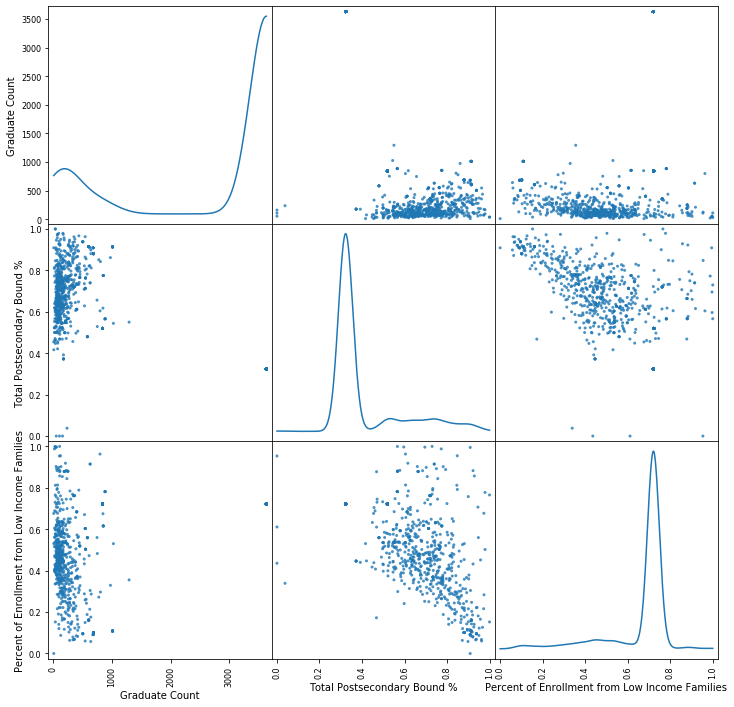

In [151]:
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(total_data, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

In [153]:
#Instruction6:Is there any strong correlation between any of the features.  Run a correlation analysis on the three features.

total_data.corr()

In [161]:
data_no_lea = total_data[['Graduate Count', 'Total Postsecondary Bound %', 'Percent of Enrollment from Low Income Families', 'Composite Score Average', 'Composite Average']]

In [192]:
data_no_lea = data_no_lea[data_no_lea['Composite Score Average'] != '*']
data_no_lea = data_no_lea[data_no_lea['Composite Average'] != '*']

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [193]:
data_no_lea['Composite Score Average'] = data_no_lea['Composite Score Average'].astype(float)
data_no_lea['Composite Average'] = data_no_lea['Composite Average'].astype(float)

In [194]:
data_no_lea.dtypes

Graduate Count                                    float64
Total Postsecondary Bound %                       float64
Percent of Enrollment from Low Income Families    float64
Composite Score Average                           float64
Composite Average                                 float64
dtype: object

In [195]:
#Instruction7: Carry out the regression, first standardizing our variables. This is strictly not necessary, but we are doing it as we wish to play around with PCA. 
#Since scikit-learn wants a n_sample rows times n_features matrix, we need to reshape the x variable. We store both an _vec variable, which is easier to plot with, 
#as well as the reshaped variable. 

from sklearn.linear_model import LinearRegression
X_HD=data_no_lea.values

In [196]:
X_HD

array([[1.56000000e+02, 4.67948718e-01, 1.72470000e-01, 1.11030000e+03,
        2.50000000e+01],
       [2.55500000e+02, 8.76715686e-01, 2.16337000e-01, 1.17610000e+03,
        2.70000000e+01],
       [5.62000000e+02, 8.55871886e-01, 2.61723333e-01, 1.12230000e+03,
        2.60000000e+01],
       ...,
       [1.68500000e+02, 8.10223350e-01, 3.52373000e-01, 1.12570000e+03,
        2.60000000e+01],
       [2.04000000e+02, 7.60011552e-01, 3.66039000e-01, 1.19700000e+03,
        2.80000000e+01],
       [1.77500000e+02, 7.09864788e-01, 5.14632200e-01, 1.14970000e+03,
        2.50000000e+01]])

In [197]:
X_HDn=(X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
radius_std_vec=X_HDn[:,0]
radius_std=radius_std_vec.reshape(-1,1)
texture_std_vec=X_HDn[:,1]
texture_std=texture_std_vec.reshape(-1,1)

In [198]:
#Instruction8: Split the data into a training set and a testing set. By default, 25% of the data is reserved for testing. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)

In [199]:
#Instrusction9: Use the training set for the fit, and find what our predictions ought to be on both the training and test set.

clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()
print (clf1.coef_, clf1.intercept_)

[-0.9140325] 0.00010920032925111015


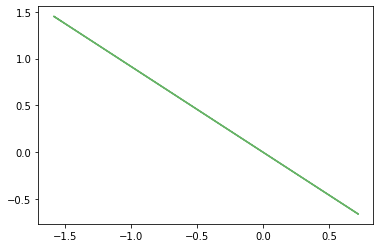

In [200]:
#Instruction10: Plot the scatter against the fit for both training and test data.
import matplotlib.pyplot as plt

# plt.scatter(educ_coll_std_vec, average_income_std_vec,c='r')
plt.plot(trains, predicted_train, c='g', alpha=0.5)
plt.plot(tests, predicted_test, c='g', alpha=0.2)

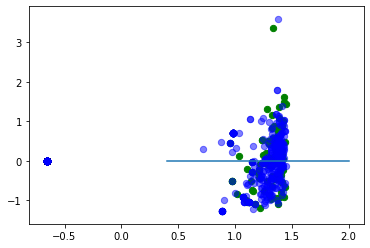

In [201]:
#Instruction11: Look at the residuals, again on both sets.

plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])

In [241]:
#Instruction12: Take the standarddized data and do a 2-D PCA on it. 
#Here we do not seek to accomplish a dimensional reduction, but to understand the variance structure of the data.

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X = pca.fit_transform(X_HDn)
print (pca.explained_variance_ratio_)

[0.71604069 0.1358885  0.08416646 0.05183928]


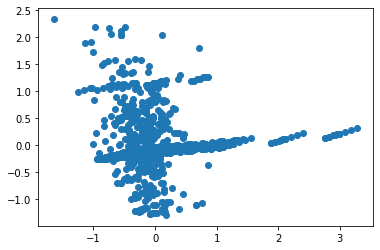

In [243]:
plt.scatter(X[:, 2], X[:, 3])

In [244]:
#Instruction13: Reconstruct the original data from only the first component, setting the others to 0.

pca1 = PCA(n_components=4) # only keep one dimension!
X_E = pca1.fit_transform(X_HDn)
X_reconstructed = pca1.inverse_transform(X_E)

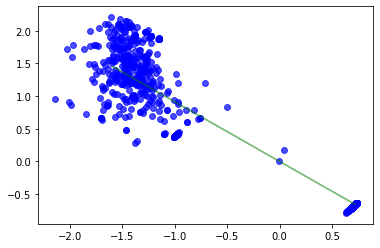

In [245]:
#Instruction14: Plot the reconstructed education(x) and income(y) from the first principal component, in blue.

plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],c='b', s=35, alpha=0.7)
# plt.scatter(educ_coll_std_vec, average_income_std_vec, s=40, c='r', alpha=0.6)
plt.plot(trains, predicted_train, c='g', alpha=0.3)
plt.plot(tests, predicted_test, c='g', alpha=0.3)

In [225]:
#Part2: Logistic Regression Instuctions

In [246]:
#Instruction1: Load the array
data=np.array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

(51.59014336917562, 82.40985663082436, -0.06517660044150111, 1.065176600441501)

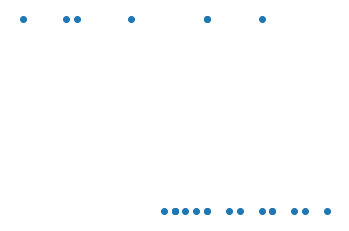

In [249]:
#Instruction2: Plot the array.

temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
axes.grid(False)
axes.axis('off')

In [250]:
#Instruction3: Run Logistic Regression with sklearn.linear_model and set c to 1000.

from sklearn.linear_model import LogisticRegression
reg=1000.
clf4 = LogisticRegression(C=reg)
clf4.fit(temps.reshape(-1,1), pfail)


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [251]:
#Instruction4: Make predictions, get the associated probabilities, and plot them.

tempsnew=np.linspace(20., 90., 15)
probs = clf4.predict_proba(tempsnew.reshape(-1,1))[:, 1]
predicts = clf4.predict(tempsnew.reshape(-1,1))

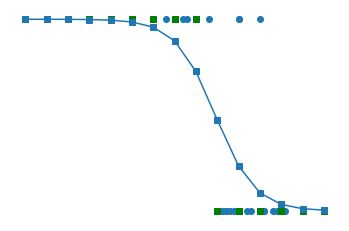

In [252]:
plt.scatter(temps, pfail)
axes=plt.gca()
axes.grid(False)
axes.axis('off')
plt.plot(tempsnew, probs, marker='s')
plt.scatter(tempsnew, predicts, marker='s', color="green")

In [253]:
#Instruction5: use pandas crosstab to write a table of prediction vs failure on the "training" set.

pd.crosstab(pfail, clf4.predict(temps.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,16,0
1.0,3,4


In [212]:
#Part3: Bias and Variance and Cross Validation


In [255]:
!pip install brewer2mpl

In [257]:
# Instruction1: Load the settings needed for part3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

In [258]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [259]:
#Instruction2: Load your dataset

import pandas as pd
df=pd.read_csv("data/wdbc.csv")
print(len(df.columns))
print(len(df.index))

12
569


[[-1.51473566]
 [-1.45079964]
 [-1.25385099]
 ...
 [-1.5067035 ]
 [-1.48389215]
 [-1.50092034]]


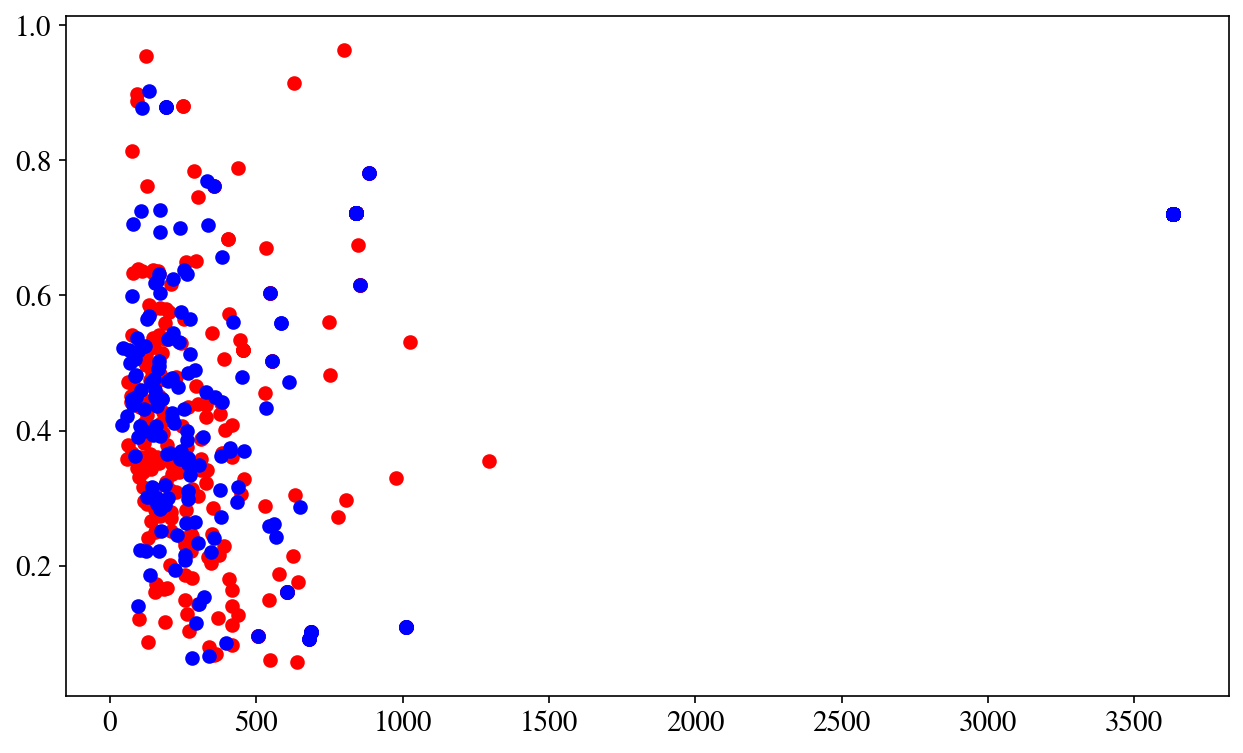

In [276]:
#Instruction3: Split the data set into equal parts test and training using the std vectors from Part1
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)


from sklearn.model_selection import train_test_split
print(radius_std)
xtrain, xtest, ytrain, ytest = train_test_split(data_no_lea['Graduate Count'], data_no_lea['Percent of Enrollment from Low Income Families'], train_size=0.6)
plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')


#Instruction4: Create a column called "class" and randomly add a "1", "2", or "3" for every row.
#e.g.
#featueA | Class
#--- | ---
#9 | 1
#5 | 2
#7 | 3
#6 | 2
#3 | 1
#6 | 3

df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
print(df.columns)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


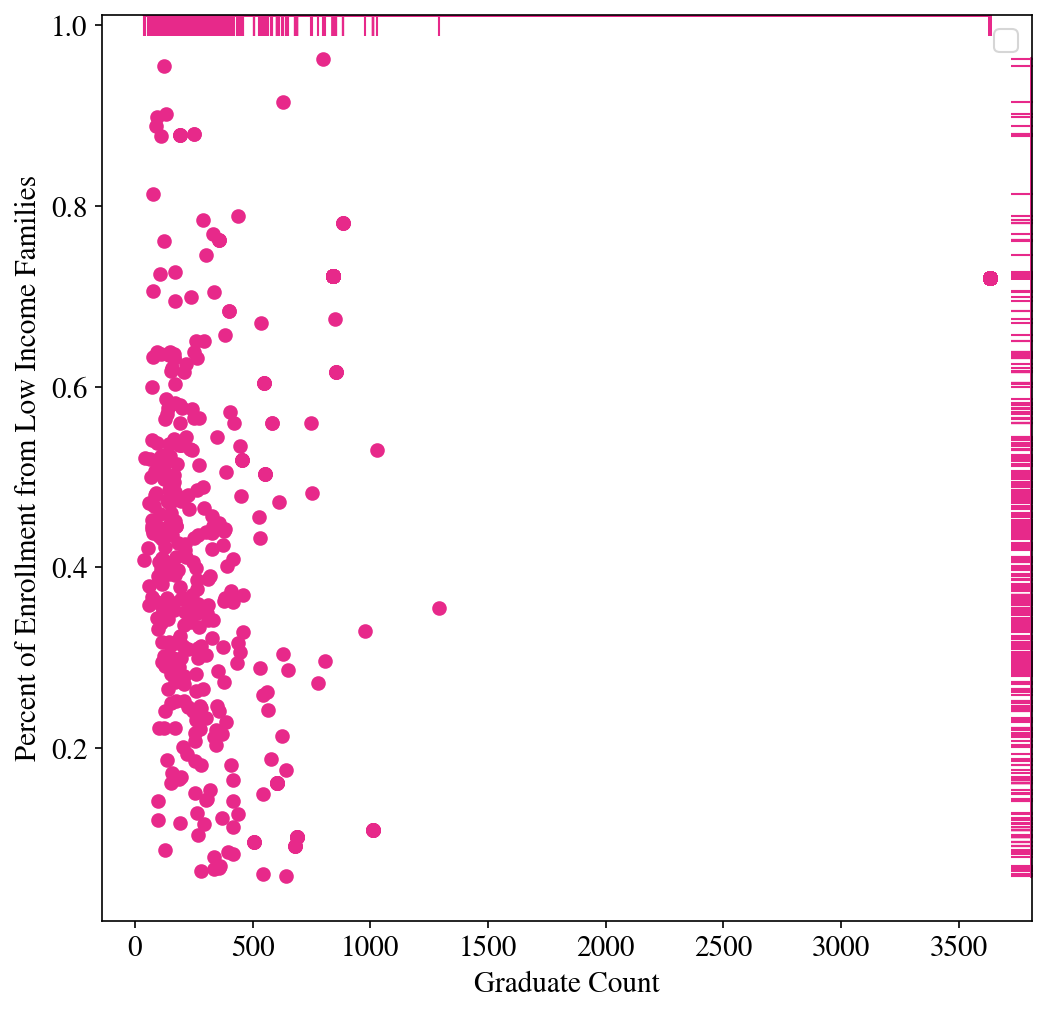

In [280]:
#Instruction5: Choose three different features in your dataset and cluster them by the randomNumCol

akeys=[1,2,3]
avals=['1','2','3']
amap={e[0]:e[1] for e in zip(akeys,avals)}
ax=scatter_by(data_no_lea, 'Graduate Count', 'Percent of Enrollment from Low Income Families', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');


In [281]:
#Instructin6: Add plotting settings
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE"), clf.score(Xte, yte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

In [306]:
#Instruction7: Develop a kNN with 20 neighbors
from sklearn.neighbors import KNeighborsClassifier
subdf=data_no_lea[['Percent of Enrollment from Low Income Families','Graduate Count']]
subdfstd=(subdf - subdf.mean())/subdf.std()
X=subdfstd.values
y=data_no_lea['Total Postsecondary Bound %'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)
Xtr=np.concatenate((Xtrain, Xtest))

In [308]:
#Instruction8: Plot the kNN model with 20 neighbors

clf = KNeighborsClassifier(2).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

ValueError: Unknown label type: 'continuous'

In [288]:
##Instruction9: Plot the kNN model with 1 neighbors

clf = KNeighborsClassifier(1).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

ValueError: Unknown label type: 'continuous'

In [294]:
##Instruction10: Plot the kNN model with 35 neighbors
clf = KNeighborsClassifier(35).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

ValueError: Unknown label type: 'continuous'

In [296]:
#Instruction#11: Develop an a KNN classifier 
Xcv,Xte,ycv,yte=train_test_split(Xtest, ytest, train_size=0.5)
print (ytrain.shape, ycv.shape, yte.shape)
trscores=[]
cvscores=[]
ns=np.arange(1,80,1)
ones=np.ones(len(ns))
for n in ns:
    clf = KNeighborsClassifier(n).fit(Xtrain, ytrain)
    trscores.append(clf.score(Xtrain, ytrain))
    cvscores.append(clf.score(Xcv, ycv))
plt.plot(ns, ones-trscores, label="training")
plt.plot(ns, ones-cvscores, label="cv")
plt.legend(loc='upper left');
print (clf.score(Xte, yte))

(745,) (248,) (249,)


ValueError: Unknown label type: 'continuous'

In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
Xtr=np.concatenate((Xtrain, Xtest))

In [297]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
parameters = {"n_neighbors": np.arange(1,80,1)}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, param_grid=parameters, cv=10)
gs.fit(Xtrain, ytrain)
#print gs.grid_scores_
print (gs.best_params_, gs.best_score_)
y_true, y_pred = ytest, gs.predict(Xtest)
print(classification_report(y_true, y_pred))


ModuleNotFoundError: No module named 'sklearn.grid_search'

In [298]:
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, gs)

NameError: name 'gs' is not defined